<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/nebula_M27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nebula M27 (Hantel-Nebel)**

The [Dumbbell Nebula](https://en.m.wikipedia.org/wiki/Dumbbell_Nebula) (also known as the Apple Core Nebula, Messier 27, and NGC 6853) is a planetary nebula (nebulosity surrounding a white dwarf) in the constellation Vulpecula, at a distance of about 1360 light-years

![sciences](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/M27_-_Noao-m27-kpno-mayall-4-m_%28north_up%29.jpg/644px-M27_-_Noao-m27-kpno-mayall-4-m_%28north_up%29.jpg)

In [ ]:
!pip install astropy astroquery -q
from astroquery.ipac.irsa import Irsa
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import ZScaleInterval
%matplotlib inline

#### *Define object and get skycoordinates*

In [ ]:
# Define object (Galaxy name)
object_name = 'M 27'

In [ ]:
# Get and set skycoordinates of object
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

skyobject = Simbad.query_object(object_name)
ra_hms = skyobject['RA'][0]
dec_dms = skyobject['DEC'][0]
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
print(skyobject)
print("\nCoordinates:")
print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

MAIN_ID       RA           DEC      RA_PREC ... COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
           "h:m:s"       "d:m:s"            ...                                                    
------- ------------- ------------- ------- ... -------------- ------------------- ----------------
  M  27 19 59 36.3631 +22 43 16.312      14 ...              O 2020yCat.1350....0G                1

Coordinates:
RA (h:m:s): 19 59 36.3631
DEC (d:m:s): +22 43 16.312


#### *Pull infrared images from IRSA*

In [ ]:
# Select collection (images)
collection = 'spitzer_seip'

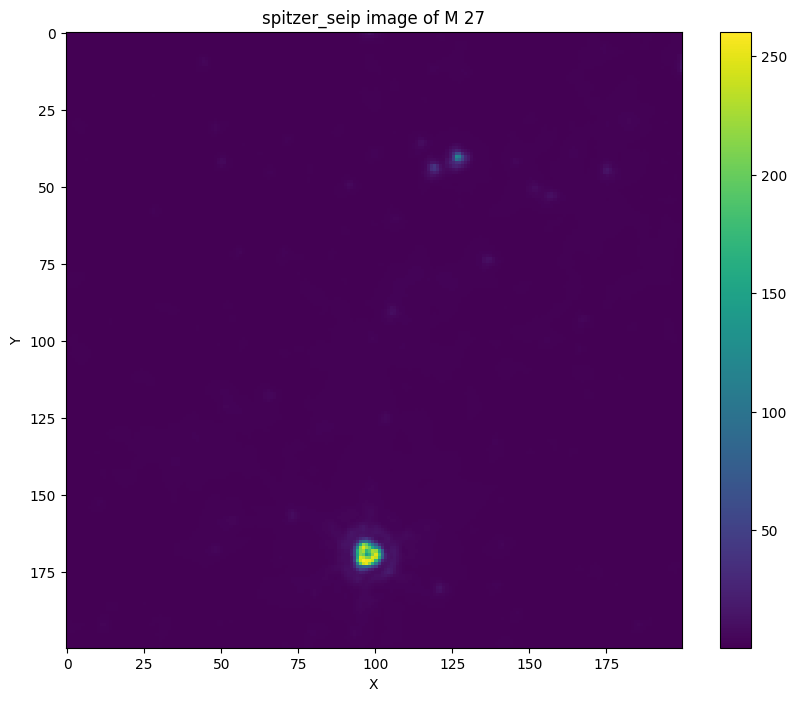

(<matplotlib.image.AxesImage at 0x784ee34160e0>,
 None)

In [ ]:
# Simple image access queries from IRSA for galaxy images from Spitzer telescope

#coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection=collection).to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][0]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8)).add_subplot().set(title=f'{collection} image of {object_name}', xlabel='X', ylabel='Y')
plt.imshow(cutout.data, cmap='viridis'), plt.colorbar(), plt.show()

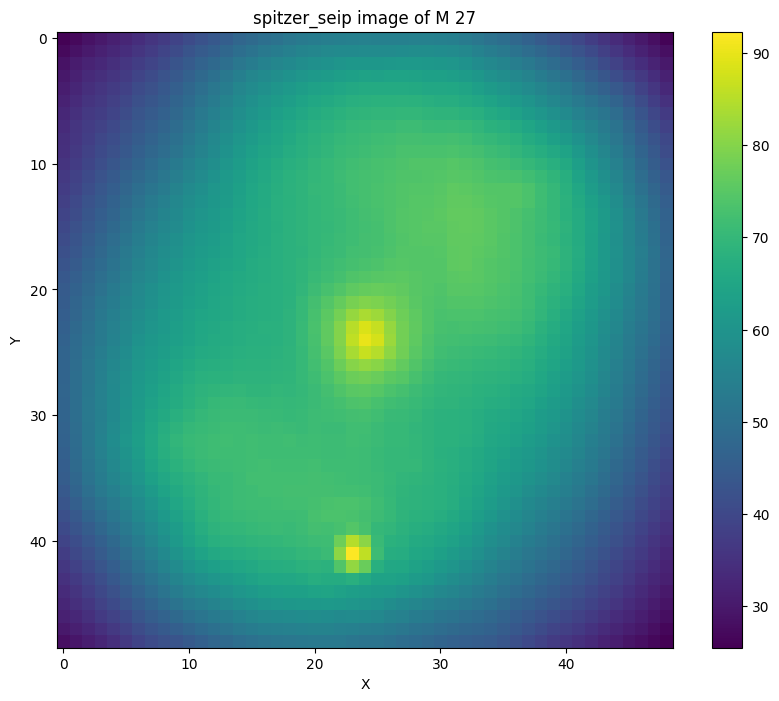

(<matplotlib.image.AxesImage at 0x784edb343af0>,
 None)

In [ ]:
#coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection=collection).to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][17]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8)).add_subplot().set(title=f'{collection} image of {object_name}', xlabel='X', ylabel='Y')
plt.imshow(cutout.data, cmap='viridis'), plt.colorbar(), plt.show()

In [ ]:
# How many science picture are therein spitzer_images?
science_images_count = len(spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'])
print("Number of science images:", science_images_count)

Number of science images: 18


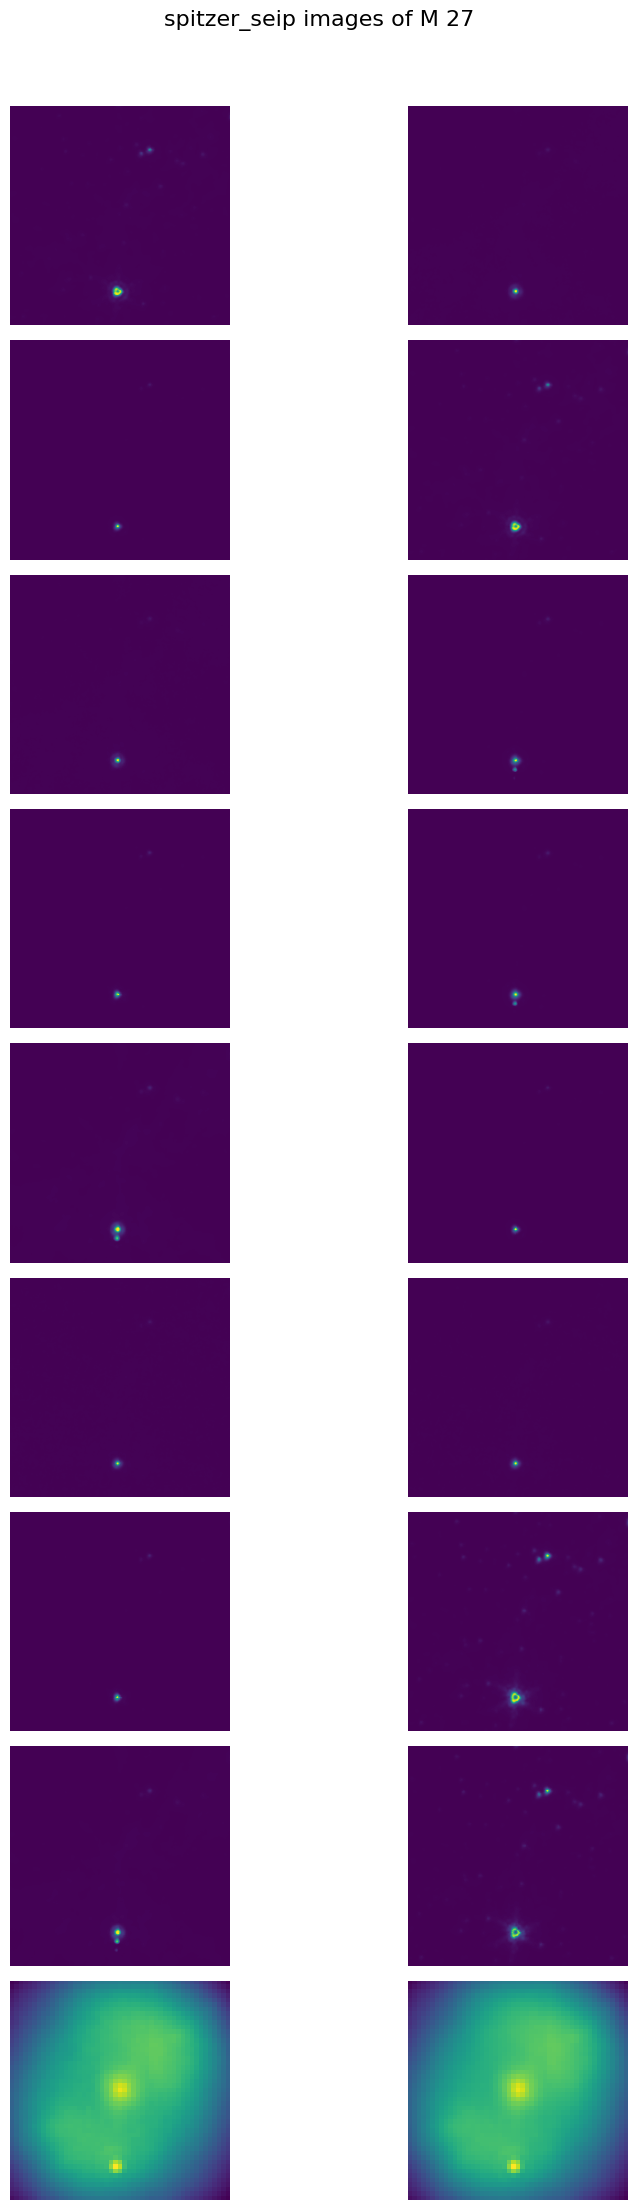

In [ ]:
# Simple image access queries from IRSA for object images from telescope
irsa_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection=collection).to_table()
irsa_images = irsa_images[irsa_images['dataproduct_subtype'] == 'science'] # Filter science images only

# Limit to a max number of images
max_images = 18
irsa_images_count = min(len(irsa_images), max_images)

# Set up the figure for a grid (2 images per row, total number of images/2 rows)
n_rows = (irsa_images_count + 1) // 2  # Using ceiling division to handle odd numbers
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 2.5 * n_rows))

# Loop through each of the science images
for i in range(irsa_images_count):
    # Access each science image URL
    irsa_image = irsa_images[i]
    with fits.open(irsa_image['access_url'], use_fsspec=True) as hdul:
        cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))
        # Plot the cutout in the grid
        ax = axes[i // 2, i % 2]  # Calculate row and column for 2 images per row
        ax.imshow(cutout.data, cmap='viridis')
        ax.axis('off')  # Hide axes for clarity

# Hide empty subplots if odd number of images
if irsa_images_count % 2:
    axes[-1, -1].axis('off')

plt.suptitle(f'{collection} images of {object_name}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()

#### *SDSS data*


In [ ]:
# Check data availability
from astroquery.sdss import SDSS
sdss_table = SDSS.query_region(coord, radius=2*u.arcmin) # broaden radius with radius=2*u.arcmin
print(sdss_table)

None


In [ ]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# Define the SDSS parameters from the result table (example)
run = 6073
rerun = 301
camcol = 4
field = 64

# Query the image using the specific SDSS parameters
try:
    images = SDSS.get_images(run=run, rerun=rerun, camcol=camcol, field=field, band='g')

    # Display the first image result
    for image in images:
        plt.figure(figsize=(12, 12))
        plt.imshow(image[0].data, cmap='viridis')
        plt.colorbar()
        plt.title(f'SDSS Image (run: {run}, camcol: {camcol}, field: {field})')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

#### *MAST composite images*

In [ ]:
# Code for Multi-Wavelength Composite (with MAST)

from astroquery.mast import Observations
from astropy.visualization import make_lupton_rgb

# Function to create composite image
def process_hst_images(params):
    # Search for observations
    obs_table = Observations.query_region(params.coords, radius=params.search_radius)

    # Filter for HST observations with specific filters
    hst_obs = obs_table[obs_table['instrument_name'] == params.instrument]

    # Get observations for each filter
    filter_data = {}
    for color, filter_name in params.rgb_filters.items():
        filter_data[color] = hst_obs[hst_obs['filters'] == filter_name]
        print(f"{filter_name}: {len(filter_data[color])} observations")

    # Check if we have all required filters
    if all(len(data) > 0 for data in filter_data.values()):
        print("\nDownloading data products...")

        # Download and process each filter
        hdus = {}
        for color, observations in filter_data.items():
            products = Observations.get_product_list(observations[0]['obsid'])
            files = Observations.download_products(products[products['productSubGroupDescription'] == 'DRZ'])
            hdus[color] = fits.open(files['Local Path'][0])[1]

        # Reproject images to match the red channel
        print("Aligning images...")
        aligned_data = {
            'red': hdus['red'].data,
            'green': reproject_interp(hdus['green'], hdus['red'].header)[0],
            'blue': reproject_interp(hdus['blue'], hdus['red'].header)[0]
        }

        # Normalize the data
        print("Normalizing data...")
        normalized_data = {color: normalize(data) for color, data in aligned_data.items()}

        # Create RGB image
        print("Creating color composite...")
        rgb = make_lupton_rgb(
            normalized_data['red'],
            normalized_data['green'],
            normalized_data['blue'],
            Q=params.rgb_params['Q'],
            stretch=params.rgb_params['stretch']
        )

        # Plot
        plt.figure(figsize=params.figure_size)
        plt.imshow(rgb, origin='lower')
        plt.title(f'{params.object_name} - HST {params.instrument} Composite')
        plt.axis('off')
        plt.show()
    else:
        print("Could not find all required filter observations")

def normalize(arr):
    """Normalize array data"""
    arr = np.nan_to_num(arr, 0)  # Replace NaN with 0
    return arr / np.percentile(arr[arr > 0], 99)

In [ ]:
# Filter combinations for Object (HST observations)
from astroquery.mast import Observations
import astropy.units as u
from astropy.coordinates import SkyCoord

# coords = coord # SkyCoord('13h29m52.7s +47d11m43s', unit=(u.hourangle, u.deg)) # e.g. for M51
# Search for observations
obs_table = Observations.query_region(coord, radius=0.2 * u.deg)

# Get unique combinations of instruments and filters
hst_obs = obs_table[obs_table['obs_collection'] == 'HST']
unique_filters = {}

for obs in hst_obs:
    instrument = obs['instrument_name']
    filt = obs['filters']
    if instrument not in unique_filters:
        unique_filters[instrument] = set()
    if filt:  # Some observations might not have filter info
        unique_filters[instrument].add(filt)

# Print available filters by instrument
for instrument, filters in unique_filters.items():
    print(f"\n{instrument} filters:")
    for f in sorted(filters):
        print(f"  - {f}")


FGS filters:
  - F583W
  - NOCHANGE;F583W

WFPC2/PC filters:
  - F160BW
  - F502N
  - F547M
  - F555W
  - F606W
  - F656N
  - F658N
  - F673N
  - F814W
  - detection

STIS filters:
  - E140M

STIS/CCD filters:
  - G230LB
  - G430L
  - G750L
  - G750M
  - MIRVIS

WFPC2 filters:
  - F1042M;F437N
  - F555W

WFPC/WFC filters:
  - F469N
  - F656N
  - F658N

STIS/FUV-MAMA filters:
  - E140M

COS/FUV filters:
  - G160M
  - N/A

COS filters:
  - G160M

ACS/WFC filters:
  - F435W
  - F502N
  - F555W

WFC3/IR filters:
  - BLANK
  - F105W
  - F110W
  - F125W
  - F126N
  - F127M
  - F139M
  - F140W
  - F153M
  - F160W

WFC3/UVIS filters:
  - F280N
  - F336W
  - F350LP
  - F373N
  - F390M
  - F390W
  - F438W
  - F467M
  - F475W
  - F475X
  - F487N
  - F502N
  - F547M
  - F600LP
  - F606W
  - F631N
  - F657N
  - F814W
  - FQ889N

WFPC/PC filters:
  - F555W
  - F785LP

NICMOS/NIC3 filters:
  - BLANK
  - F160W
  - G141

NICMOS/NIC1 filters:
  - BLANK
  - F110W
  - F160W

NICMOS/NIC2 filters:
  - BLAN

In [ ]:
# Create composite image of astronomical objects automatically
# ('object_name' and 'coord' are defined in the beginning, 'rgb_filters' and 'instrument' above)

class ObservationParams:
    def __init__(self):
        # Target coordinates
        self.coords = coord
        self.search_radius = 0.2 * u.deg

        # RGB filter configuration
        self.rgb_filters = {
            'blue': 'F336W',
            'green': 'F606W',
            'red': 'F814W'
        }

        # Instrument configuration
        self.instrument = 'WFC3/UVIS'

        # Image processing parameters
        self.rgb_params = {
            'Q': 10,
            'stretch': 0.5
        }

        # Visualization parameters
        self.figure_size = (10, 10)
        self.object_name = object_name

# Execute image processing
params = ObservationParams()
process_hst_images(params)

F336W: 2 observations
F606W: 2 observations
F814W: 2 observations



TypeError: 'NoneType' object is not subscriptable